Первый вариант. Исследуем распределение хи-квадрат.

1.1 Случайная величина имеет распределение $X_n \sim \chi^2_n$. Построить графики плотности сл.в. $X_n,~ \dfrac{(X_n-n)}{\sqrt{2n}}$ для $n=1,\,2,\,3,\,5,\,20,\,100$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from scipy.stats import bernoulli
from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import uniform

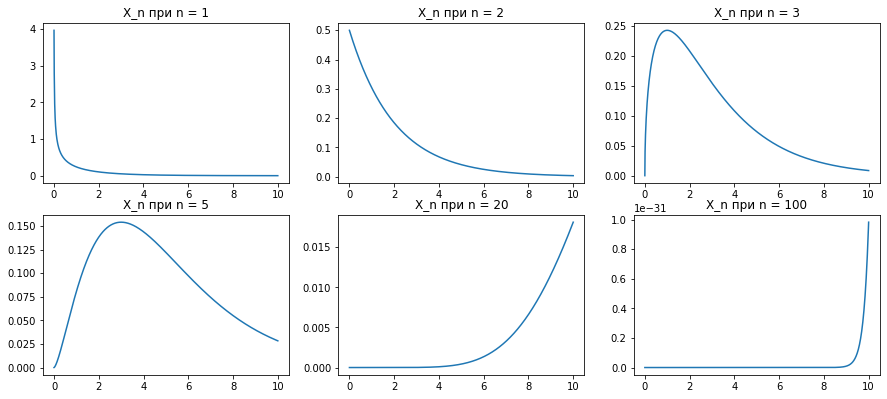

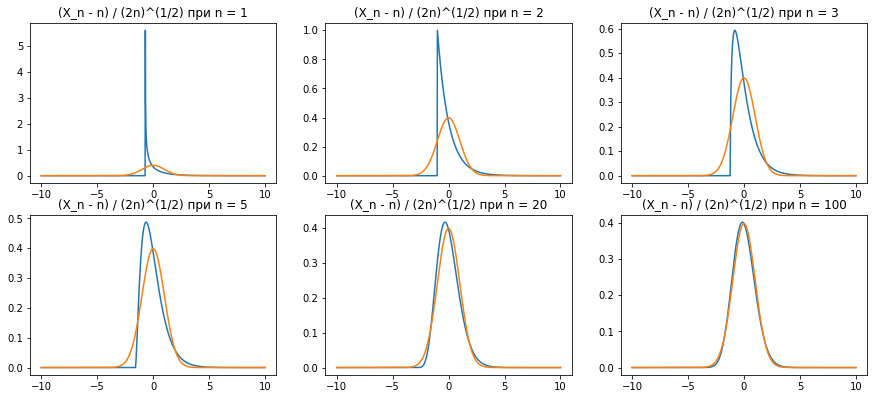

In [3]:
x = np.linspace(0, 10, 1001)

fig, ax = plt.subplots(figsize=(15, 10))

num = 0
n = [1, 2, 3, 5, 20, 100]

for nn in n:
    num += 1
    
    name = "X_n при n = " + str(nn)
    plt.subplot(3, 3, num)
    plt.plot(x, chi2.pdf(x, nn))
    plt.title(name)
    
    
    
x = np.linspace(-10, 10, 1001)
fig1, ax = plt.subplots(figsize=(15, 10))


num = 0
for nn in n:
    num += 1
    
    name = "(X_n - n) / (2n)^(1/2) при n = " + str(nn)
    plt.subplot(3, 3, num)
    plt.plot(x, chi2.pdf(x, nn, loc = -nn/math.sqrt(2*nn), scale = 1/math.sqrt(2*nn)))
    plt.plot(x, norm.pdf(x,0,1))
    plt.title(name)


In [4]:
#пункт а
n = [1, 2, 5, 50]
q = 1000
m = 50
quantile = chi2.ppf(0.95, m)

print('Для равномерного распределения получаем: \n')
for nn in n:
    res = 0
    med = nn/2
    var = nn/12
    for i in range (q):
        x = np.random.uniform(0, 1, (m, nn))
        temp_1 = 0
        for kk in range(m):
            temp_1 += (((np.sum(x[kk, :]) - med)/(math.sqrt(var)))**2)
        if (temp_1 <= quantile):
            res +=1
    print('n = %d' % nn, res / q)

Для равномерного распределения получаем: 

n = 1 0.995
n = 2 0.979
n = 5 0.964
n = 50 0.947


In [5]:
#пункт б
n = [1, 2, 5, 50]
q = 1000
m = 50
p = 0.1
quantile = chi2.ppf(0.95, m)

print('Для распределения Бернулли получаем: \n')
for nn in n:
    res = 0
    var = p*(1-p)*nn
    med = nn*p
    for i in range (q):
        x = bernoulli.rvs(p, size = (m, nn))
        temp_1 = 0
        for kk in range(m):
            temp_1 += (((np.sum(x[kk, :]) - med)/(math.sqrt(var)))**2)
        if (temp_1 <= quantile):
            res +=1
    print('n = %d' % nn, res / q)

Для распределения Бернулли получаем: 

n = 1 0.776
n = 2 0.86
n = 5 0.909
n = 50 0.943


In [6]:
#пункт с
n = [1, 2, 5, 50]
q = 1000
m = 50
p = 0.9
quantile = chi2.ppf(0.95, m)

print('Для смешанного нормального распределения получаем: \n')
for nn in n:
    res = 0
    var = nn*(10+9/10)
    med = 0
    x = []
    for i in range (q):
        y = 0
        for ii in range(m):
            count = 0
            y0 = bernoulli.rvs(p, size = nn)
            for i in y0:
                count += i
            y1 = norm.rvs(0, 1, size = count)
            y2 = norm.rvs(0, 10, size = nn - count)
            x = np.append(y1, y2)
            y += ((((np.sum(x[:])) - med)/(math.sqrt(var)))**2)
        if y <= quantile:
            res += 1
    print('n = %d' % nn, res / q)

Для смешанного нормального распределения получаем: 

n = 1 0.765


KeyboardInterrupt: 

In [9]:
# 1.3
N = 1000
n=10
sigma = 5
X = [np.random.normal(0, sigma, n) for _ in range(0,N)]

S=[]
for i in range(0,N):
    s=0
    for m in range(0,n):
        s = s + ((X[i][m]-np.mean(X[i]))**2)/n
    S.append(s)

alfa = 0.05
p1=0
p2=0
for i in range(0,N):
    if sigma**2>n*S[i]/chi2.ppf(1-alfa/2,n-1) and sigma**2<n*S[i]/chi2.ppf(alfa/2,n-1):
        p1 = p1 + 1/N
    if sigma**2>n*S[i]/chi2.ppf(1-alfa/2,n) and sigma**2<n*S[i]/chi2.ppf(alfa/2,n):
        p2 = p2 + 1/N
        
print("Вероятность попасть в правильный интервал: ", p1)
print("Вероятность попасть в неправильный интервал: ", p2)

Вероятность попасть в правильный интервал:  0.9440000000000007
Вероятность попасть в неправильный интервал:  0.9400000000000007
